## Import 

In [44]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

from sklearn.preprocessing import LabelEncoder
#from sklearn.ensemble import RandomForestClassifier
%pip install xgboost
from xgboost import XGBClassifier
from sklearn.preprocessing import MultiLabelBinarizer

%pip install missingno
import missingno as msno

import re

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Data Load & Check Data

In [45]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,ID,generation,school1,major type,major1_1,major1_2,major_data,job,class1,class2,class3,class4,re_registration,contest_award,nationality,inflow_route,whyBDA,what_to_gain,hope_for_group,previous_class_3,previous_class_4,previous_class_5,previous_class_6,previous_class_7,previous_class_8,major_field,desired_career_path,completed_semester,project_type,time_input,desired_job,certificate_acquisition,desired_certificate,desired_job_except_data,incumbents_level,incumbents_lecture,incumbents_company_level,incumbents_lecture_type,incumbents_lecture_scale,incumbents_lecture_scale_reason,interested_company,expected_domain,contest_participation,idea_contest,onedayclass_topic,completed
0,TRAIN_000,9,22,"복수 전공 ( 다중전공, 이중전공 포함 )",경제통상학,자연과학,False,대학생,1,4.0,NaN,NaN,아니요,NaN,내국인,에브리타임,"큰 규모인 만큼, 커리큘럼이나 운영 등 관리가 잘 될것 같아서",프로젝트 경험,네. 온라인으로 참여하고 싶어요,NaN,NaN,NaN,NaN,NaN,NaN,"자연과학, 사회과학",대학원 진학,4.0,팀,2.0,C. 데이터 사이언티스트,컴퓨터활용능력,"ADsP, SQLD, 빅데이터 분석 기사, 태블로 관련 자격증, 구글 애널리스트",A. 금융 / 보험 직무,시니어 (10년차 ~),산업 트렌드 (예시: ChatGPT로 인한 직무 변화),해외 기업 (빅테크),"온, 오프라인 동시",100명 이상의 리스너와 10명 이상의 현직자,다양한 사람들과 만나서 생각을 교류할 수 있기 때문,"구글 딥마인드, 카카오 브레인","M. 전문, 과학 및 기술 서비스업",NaN,NaN,"Python 응용, 데이터 시각화 (Matplotlib, Seaborn 등), 머신...",0
1,TRAIN_001,9,1,"복수 전공 ( 다중전공, 이중전공 포함 )",자연과학,IT(컴퓨터 공학 포함),True,대학생,8,NaN,NaN,NaN,아니요,NaN,내국인,지인 추천,"큰 규모인 만큼, 커리큘럼이나 운영 등 관리가 잘 될것 같아서",데이터 분석 역량,네. 오프라인으로 참여하고 싶어요,NaN,NaN,NaN,NaN,NaN,NaN,사회과학,취업,6.0,팀,3.0,"B. 데이터 분석가, C. 데이터 사이언티스트",없음,"ADsP, SQLD, 빅데이터 분석 기사, 정보처리기사","D. 소프트웨어 개발자, F. PM / 서비스 기획자",주니어 (0~3년차),커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정),국내 빅테크 IT 계열 (네카라쿠배당토),오프라인,3~50명 내외의 강의 리스너와 1명의 현직자,더 많은 사람들이 있으면 제가 예상하지 못한 질문도 할 수 있다고 생각하기 때문입니다.,제일 기획,"J. 정보통신업, O. 공공 행정, 국방 및 사회보장 행정",NaN,NaN,머신러닝 / 딥러닝 응용,0
2,TRAIN_002,9,27,단일 전공,예체능,NaN,False,대학생,7,NaN,NaN,NaN,아니요,NaN,내국인,인스타그램,"BDA 학회원만의 혜택을 누리고 싶어서(현직자 강연, 잡 페스티벌, 기업연계 공모전 등)",공모전 경험,네. 오프라인으로 참여하고 싶어요,NaN,NaN,NaN,NaN,NaN,NaN,예체능,대학원 진학,8.0,개인,10.0,"B. 데이터 분석가, C. 데이터 사이언티스트, I. 마케터",ADsP,"SQLD, 빅데이터 분석 기사, 정보처리기사","A. 금융 / 보험 직무, B. 기획 / 전략 / 경영 직무, H. 마케터 / 영업관리",주니어 (0~3년차),직무 강의 (예시: 실무 진행 방식 및 직무 준비생을 위한 팁),"국내 대기업 IT 계열 (금융, 제조 ...)",오프라인,3~50명 내외의 강의 리스너와 1명의 현직자,인원이 너무 적으면 서로 부담스러울 수 있을 것 같지만 너무 많으면 너무 피상적인 ...,Lg전자,"C. 제조업, K. 금융 및 보험업, R. 예술, 스포츠 및 여가관련 서비스업",NaN,NaN,"머신러닝 / 딥러닝 응용, SQL 응용, 웹 크롤링",0
3,TRAIN_003,9,1,"복수 전공 ( 다중전공, 이중전공 포함 )",사회과학,IT(컴퓨터 공학 포함),False,대학생,7,NaN,NaN,NaN,아니요,NaN,내국인,에브리타임,혼자 공부하기 어려워서,프로젝트 경험,네. 온라인으로 참여하고 싶어요,NaN,NaN,NaN,NaN,NaN,NaN,법학,취업,8.0,팀,2.0,"B. 데이터 분석가, C. 데이터 사이언티스트","SQLD, 정보처리기사","ADsP, 빅데이터 분석 기사",A. 금융 / 보험 직무,주니어 (0~3년차),커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정),국내 빅테크 IT 계열 (네카라쿠배당토),"온, 오프라인 동시",3~50명 내외의 강의 리스너와 1명의 현직자,너무 많은 인원이 강의하면 루즈해질 것 같아서,네이버,"J. 정보통신업, K. 금융 및 보험업",NaN,NaN,머신러닝 / 딥러닝 응용,1
4,TRAIN_004,9,16,"복수 전공 ( 다중전공, 이중전공 포함 )",IT(컴퓨터 공학 포함),IT(컴퓨터 공학 포함),True,대학생,8,NaN,NaN,NaN,아니요,NaN,내국인,지인 추천,"큰 규모인 만큼, 커리큘럼이나 운영 등 관리가 잘 될것 같아서",공모전 경험,네. 오프라인으로 참여하고 싶어요,NaN,NaN,NaN,NaN,NaN,NaN,"IT (컴퓨터 공학 포함), 인문학",취업,7.0,팀,2.0,B. 데이터 분석가,ADsP,"SQLD, 정보처리기사, 태블로 관련 자격증, 구글 애널리스트","A. 금융 / 보험 직무, B. 기획 / 전략 / 경영 직무, F. PM / 서비스...",주니어 (0~3년차),직무 강의 (예시: 실무 진행 방식 및 직무 준비생을 위한 팁),"국내 대기업 IT 계열 (금융, 제조 ...)","온, 오프라인 동시",3~50명 내외의 강의 리스너와 1명의 현직자,다양한 사람들에게 기회가 있으면 좋겠습니다.,네이버,"K. 금융 및 보험업, M. 전문, 과학 및 기술 서비스업, R. 예술, 스포츠 및...",NaN,NaN,"머신러닝 / 딥러닝 응용, SQL 응용, 웹 크롤링",0


In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               748 non-null    object 
 1   generation                       748 non-null    int64  
 2   school1                          748 non-null    int64  
 3   major type                       726 non-null    object 
 4   major1_1                         728 non-null    object 
 5   major1_2                         309 non-null    object 
 6   major_data                       748 non-null    bool   
 7   job                              748 non-null    object 
 8   class1                           748 non-null    int64  
 9   class2                           169 non-null    float64
 10  class3                           14 non-null     float64
 11  class4                           1 non-null      float64
 12  re_registration       

타겟 변수 분포:
0    0.701872
1    0.298128
Name: completed, dtype: float64


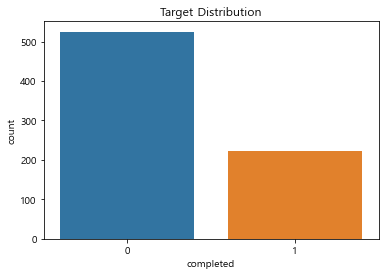

In [47]:
# 타겟 변수 비율 확인
print("타겟 변수 분포:")
print(train['completed'].value_counts(normalize=True))

# 시각화
sns.countplot(x='completed', data=train)
plt.title('Target Distribution')
plt.show()

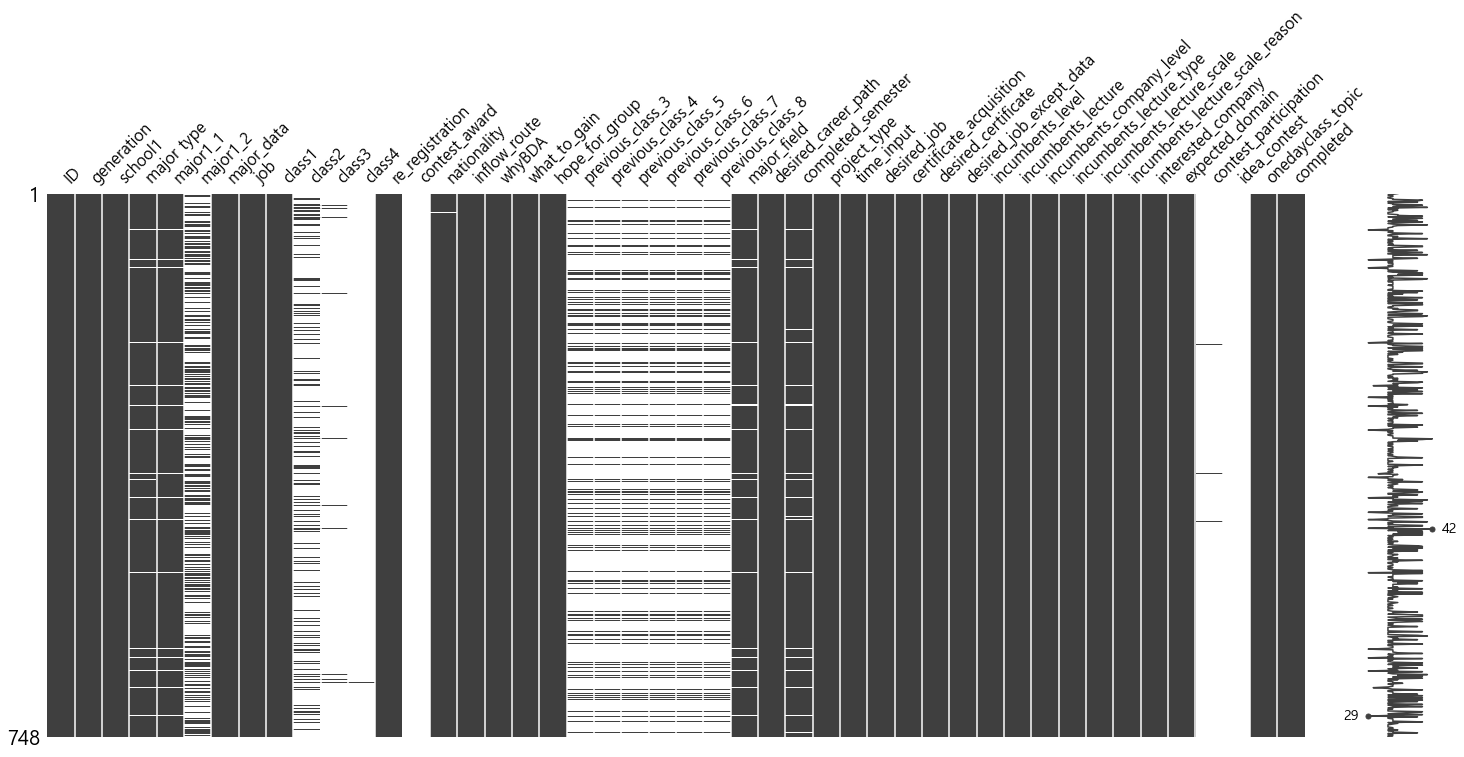

삭제된 컬럼: ['class3', 'class4', 'contest_award', 'previous_class_3', 'previous_class_4', 'previous_class_5', 'previous_class_6', 'previous_class_7', 'previous_class_8', 'contest_participation', 'idea_contest']


In [48]:
msno.matrix(train)
plt.show()

# 삭제된 컬럼들이 무엇인지 확인 (중요한 정보일 수도 있음)
missing_ratio = train.isnull().mean()
print("삭제된 컬럼:", missing_ratio[missing_ratio > 0.8].index.tolist())

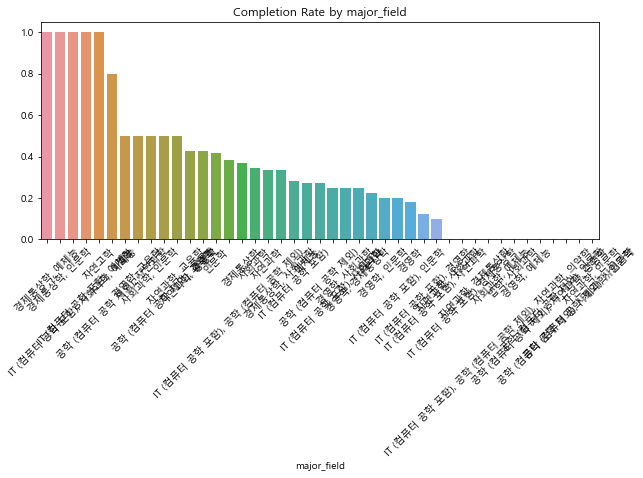

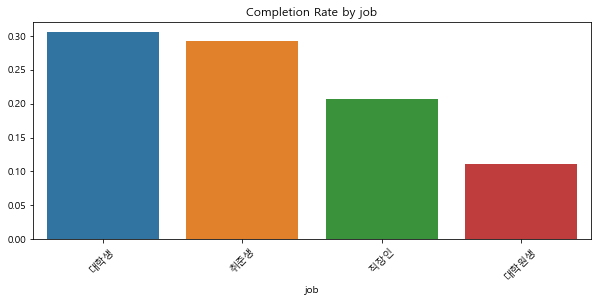

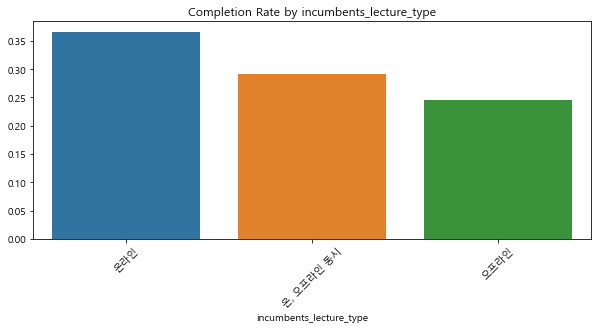

In [49]:
# 주요 범주형 변수별 수료율 시각화 함수
def plot_conversion_rate(df, col):
    temp = df.groupby(col)['completed'].mean().sort_values(ascending=False)
    plt.figure(figsize=(10, 4))
    sns.barplot(x=temp.index, y=temp.values)
    plt.title(f'Completion Rate by {col}')
    plt.xticks(rotation=45)
    plt.show()

# 예시: 전공 계열, 현재 직업, 희망 직무별 수료율 확인
for col in ['major_field', 'job', 'incumbents_lecture_type']:
    plot_conversion_rate(train, col)

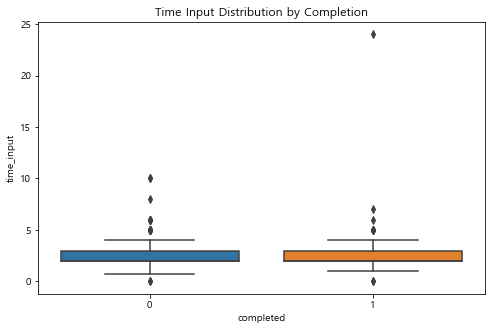

In [50]:
# 시간 투입량에 따른 수료 여부 분포
plt.figure(figsize=(8, 5))
sns.boxplot(x='completed', y='time_input', data=train)
plt.title('Time Input Distribution by Completion')
plt.show()

In [51]:
# 예: 'Python'이라는 단어가 포함되었는지 여부
train['interest_python'] = train['onedayclass_topic'].str.contains('Python').astype(int)
test['interest_python'] = test['onedayclass_topic'].str.contains('Python').astype(int)

# 관심사에 따른 수료율 차이 확인
print(train.groupby('interest_python')['completed'].mean())

interest_python
0    0.279518
1    0.321321
Name: completed, dtype: float64


## Pre-Processing

In [52]:
# =================================================================================
# 0. 데이터 로드 및 통합
# =================================================================================
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# ID 및 타겟 분리
train_y = train['completed']
train_len = len(train)

# 합치기 (ID, completed 제외)
df_all = pd.concat([train.drop(columns=['ID', 'completed']), test.drop(columns=['ID'])], axis=0).reset_index(drop=True)

print(f"1. 원본 데이터 컬럼 수: {df_all.shape[1]}")

# =================================================================================
# 1. Class (분반) 처리 : Multi-Hot Encoding
# =================================================================================
class_cols = ['class1', 'class2', 'class3', 'class4']

# 행별로 [1, NaN, 5, NaN] -> {1, 5} 집합으로 변환
class_list = df_all[class_cols].apply(lambda x: set([int(i) for i in x if pd.notnull(i)]), axis=1)

# Multi-Hot Encoding
mlb_class = MultiLabelBinarizer()
class_onehot = mlb_class.fit_transform(class_list)
class_df = pd.DataFrame(class_onehot, columns=[f"class_{c}" for c in mlb_class.classes_])

# 원본에 붙이고 기존 컬럼 삭제
df_all = pd.concat([df_all, class_df], axis=1)
df_all = df_all.drop(columns=class_cols)

# =================================================================================
# 2. Major (전공) 처리 : 로직 적용 및 Multi-Hot Encoding
# =================================================================================

# 2-1. major type 결측치 채우기 (사용자 요청 로직 반영)
def fill_major_type(row):
    # 이미 값이 있으면 그대로 리턴
    if pd.notna(row['major type']):
        return row['major type']
    
    # 값이 없을 때 추론 로직
    if pd.notna(row['major1_1']):
        if pd.notna(row['major1_2']):
            return '복수 전공'  # 전공 2개 존재
        else:
            return '단일 전공'  # 전공 1개 존재
    return 'No Degree'  # 전공 없음

df_all['major type'] = df_all.apply(fill_major_type, axis=1)

# =================================================================================
# [수정된] 2-2. 전공 필드(major_field) Multi-Hot Encoding
# =================================================================================

# 결측치 처리
df_all['major_field'] = df_all['major_field'].fillna('Unknown')

# 전공 텍스트 분리 함수
def parse_majors(text):
    if not text: return []
    # 슬래시, 가운데점 등을 콤마로 통일 후 분리
    majors = text.replace('/', ',').replace('·', ',').split(',')
    # 공백 제거 및 통일
    return [m.strip() for m in majors if m.strip()]

major_list = df_all['major_field'].apply(parse_majors)

# Multi-Hot Encoding
mlb_major = MultiLabelBinarizer()
major_onehot = mlb_major.fit_transform(major_list)

# [핵심 수정] 한글 이름 대신 고유 번호(Index)를 사용해 컬럼명 생성
# 예: "컴퓨터공학" -> "major_0", "경영학" -> "major_1"
# 이유: 한글로 두면 나중에 특수문자 제거 과정에서 이름이 다 지워짐
major_cols = [f"major_{i}" for i in range(len(mlb_major.classes_))]
major_df = pd.DataFrame(major_onehot, columns=major_cols)

# 어떤 번호가 무슨 전공인지 매핑 정보 출력 (확인용)
print("\n[전공 컬럼 매핑 정보 (상위 5개)]")
for i, cls in enumerate(mlb_major.classes_[:5]):
    print(f"major_{i} : {cls}")

# 데이터 합치기
df_all = pd.concat([df_all, major_df], axis=1)

# 기존 텍스트 컬럼 삭제
drop_major_cols = ['major1_1', 'major1_2', 'major_field', 'major type']
df_all = df_all.drop(columns=drop_major_cols)

print(f"전공 처리가 완료되었습니다. 생성된 컬럼 수: {len(major_cols)}")

# =================================================================================
# 3. 기타 핵심 파생변수 생성 및 정리
# =================================================================================

# 3-1. 수강 이력(previous_class) -> 횟수(Count)로 변환 후 삭제
prev_cols = [c for c in df_all.columns if 'previous_class' in c]
# 하나라도 값이 있으면 1, 없으면 0 -> 합계 (수강 횟수)
df_all['past_enrollment_count'] = df_all[prev_cols].notnull().sum(axis=1)
df_all = df_all.drop(columns=prev_cols)

# 3-2. 서술형 응답(reason) -> 글자 수(Length)로 변환
df_all['incumbents_lecture_scale_reason'] = df_all['incumbents_lecture_scale_reason'].fillna('').apply(len)

# 3-3. Boolean 타입(major_data 등) -> 정수(1/0) 변환
bool_cols = df_all.select_dtypes(include=['bool']).columns
df_all[bool_cols] = df_all[bool_cols].astype(int)

# 3-4. 수치형 결측치 -> 0으로 채움 (time_input 등)
num_cols = df_all.select_dtypes(include=['number']).columns
df_all[num_cols] = df_all[num_cols].fillna(0)

# =================================================================================
# 4. 나머지 범주형 변수 인코딩 및 컬럼명 세탁 (마무리)
# =================================================================================

# 4-1. 나머지 Object 컬럼 Label Encoding
cat_cols = df_all.select_dtypes(include=['string', 'object']).columns
le = LabelEncoder()
for col in cat_cols:
    df_all[col] = df_all[col].fillna('Unknown').astype(str)
    df_all[col] = le.fit_transform(df_all[col])

# 4-2. [중요] 컬럼명 특수문자/한글 제거 (XGBoost 에러 방지)
# 영어, 숫자, 밑줄(_)을 제외한 모든 문자를 밑줄로 변경
df_all.columns = [re.sub(r'[^a-zA-Z0-9]', '_', c) for c in df_all.columns]
# 중복 밑줄(__) 제거
df_all.columns = [re.sub(r'_+', '_', c) for c in df_all.columns]

# =================================================================================
# 5. 데이터 분리 및 최종 확인
# =================================================================================
train_prep = df_all.iloc[:train_len].copy()
test_prep = df_all.iloc[train_len:].copy()
train_prep['completed'] = train_y  # 정답 다시 부착

print(f"2. 전처리 완료 컬럼 수: {train_prep.shape[1]}")
print(f"3. 결측치 존재 여부: {train_prep.isnull().sum().sum()} (0이어야 함)")
print("4. 완료된 데이터 예시:")
print(train_prep.columns.tolist()[:10])

1. 원본 데이터 컬럼 수: 44

[전공 컬럼 매핑 정보 (상위 5개)]
major_0 : IT (컴퓨터 공학 포함)
major_1 : Unknown
major_2 : 경영학
major_3 : 경제통상학
major_4 : 공학 (컴퓨터 공학 제외)
전공 처리가 완료되었습니다. 생성된 컬럼 수: 13
2. 전처리 완료 컬럼 수: 58
3. 결측치 존재 여부: 0 (0이어야 함)
4. 완료된 데이터 예시:
['generation', 'school1', 'major_data', 'job', 're_registration', 'contest_award', 'nationality', 'inflow_route', 'whyBDA', 'what_to_gain']


## EDA

<AxesSubplot:>

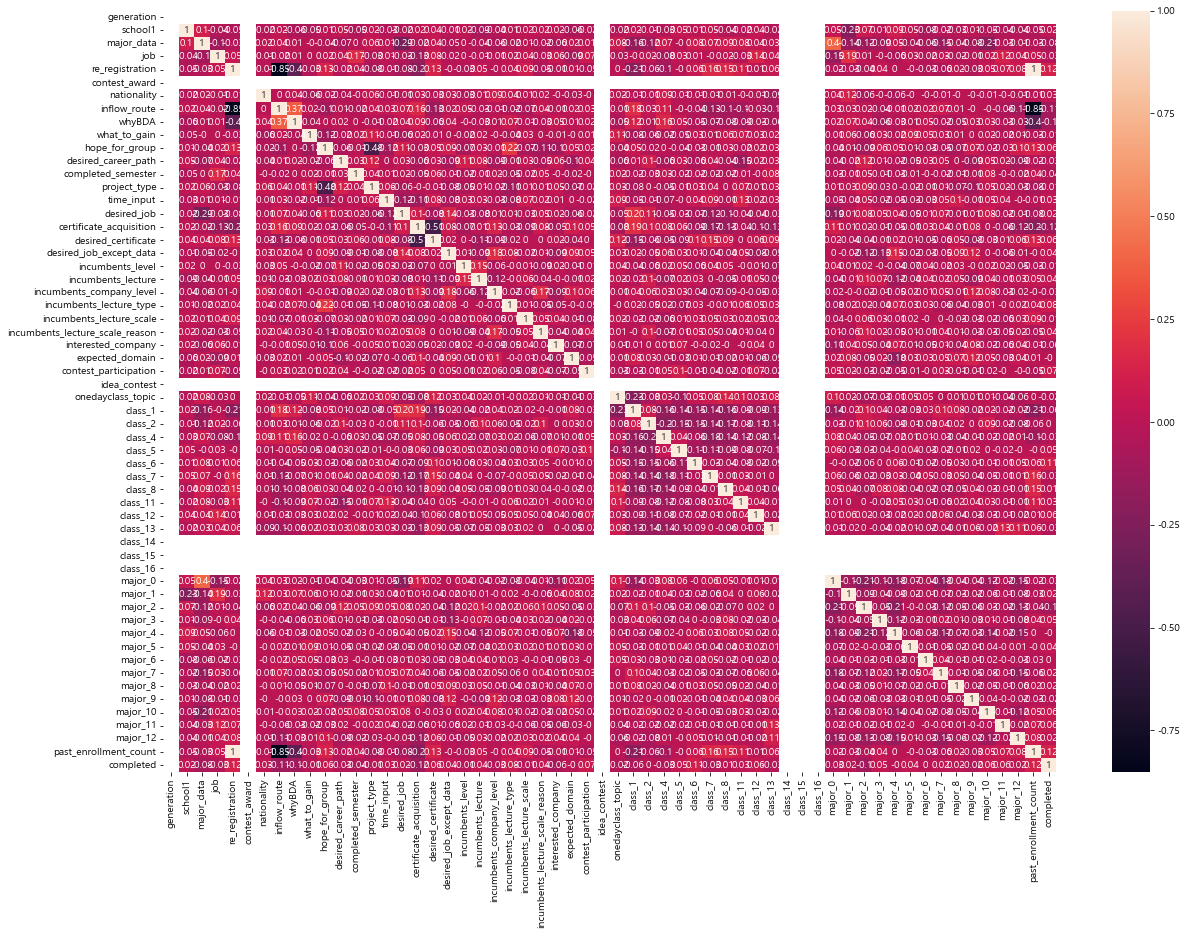

In [53]:
plt.figure(figsize=(20,14))
sns.heatmap(train_prep.corr().round(2), annot = True)

## Feature Selection & Modelling

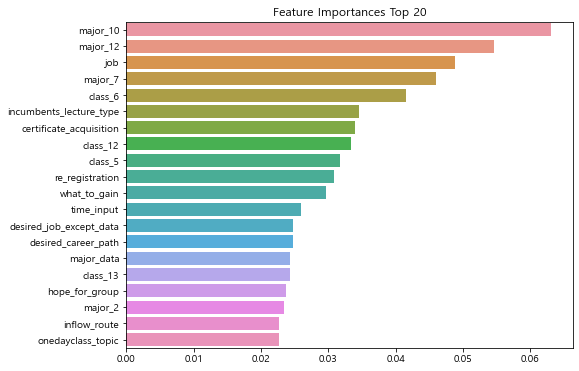

In [54]:
# 1. 학습에 사용할 변수 선택 (ID와 타겟 변수 제거)
# drop해야 할 것: 'ID', 'completed' (타겟), 그리고 텍스트 원본이 남아있다면 제거
features = train_prep.drop(columns=['completed', 'generation', 'contest_award', 'idea_contest']).columns

# X(입력), y(정답) 준비
X = train_prep[features]
y = train_prep['completed']

# 테스트 데이터도 똑같은 컬럼을 가져야 함
test_X = test_prep[features]

# 2. 모델 정의 및 학습
# random_state를 고정해야 결과가 재현됨
model_xgb = XGBClassifier(
    random_state=42, 
    scale_pos_weight=2.5,    # [중요] 1(수료)을 더 중요하게 봐라!
    n_jobs=-1
)
#model = RandomForestClassifier(random_state=42, n_jobs=-1)
model_xgb.fit(X, y)

# 3. (중요) Feature Importance 시각화
# 모델이 실제로 어떤 변수를 보고 정답을 맞혔는지 확인하는 과정

ftr_importances_values = model_xgb.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title('Feature Importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## Inference

In [55]:
pred = model_xgb.predict(test_X)

In [60]:
# 1. 예측값(0, 1) 대신 확률값(Probability)을 뽑습니다.
probs = model_xgb.predict_proba(test_X)[:, 1]  # 1일 확률만 가져옴

# 2. 임계값을 0.3으로 낮춰서 예측해봅니다. (상위 30% 이상이면 수료로 간주)
# 이 값을 0.3, 0.35, 0.4 등으로 바꿔가며 최적의 점수를 찾아야 합니다.
custom_threshold = 0.5
final_pred = (probs >= custom_threshold).astype(int)

print(f"임계값 {custom_threshold} 적용 시 1 예측 개수: {sum(final_pred)}")

임계값 0.5 적용 시 1 예측 개수: 184


## Submission

In [61]:
submission = pd.read_csv('sample_submission.csv')
submission['completed'] = final_pred
submission.to_csv('submit.csv', index = False)